<a href="https://colab.research.google.com/github/febrahim-driod/hello-world/blob/master/notebook/Yolov8_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
!pip install roboflow --quiet
!pip install clearml --quiet

Ultralytics YOLOv8.0.57 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.3 MB/s eta 0:00:00


In [2]:
import os
from IPython.display import Image, display
import glob
from clearml import Task

HOME = os.getcwd()
print(HOME)

/content


In [3]:
model_type='detection'
#model_type='body_parts'
#model_type='severity'
model_type='damage_type'

WEIGHTS_PATH = f"{HOME}/yolov8l-seg.pt"
TASK='segment'
IMGSZ=640
BATCH_SIZE=16
WORKERS=8
PATIENCE=5

#roboflow
#workspace="sinfo"
workspace="fizzy"

if model_type=="detection":
   EPOCH=30
   PROJECT_NAME="yolov8_damage_detection"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="body_parts":
   EPOCH=50
   PROJECT_NAME="yolov8_body_parts"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="severity":
   EPOCH=50
   PROJECT_NAME="yolov8_severity"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
elif model_type=="damage_type":
   EPOCH=50
   PROJECT_NAME="yolov8_damage_type"
   RUN_NAME="train_seg_"+str(EPOCH)+"_epoch"
   

In [7]:


from roboflow import Roboflow

if workspace=="sinfo":
  apikey="P5E6JhfkeiA1nAdZAWnB"
if workspace=="fizzy":
  apikey="BY0NkaVcAVgAKtFokphd"

rf = Roboflow(api_key=apikey)
if model_type=="detection":
  if workspace=="sinfo":
    project = rf.workspace(workspace).project("car_damage-4xqh8")
    dataset = project.version(6).download("yolov8")
    DATA_FOLDER='car_damage-6'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"
elif model_type=="body_parts":
  project = rf.workspace(workspace).project("car-body-parts-p025a")
  dataset = project.version(5).download("yolov8")
  DATA_FOLDER='car-body-parts-5'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"
elif model_type=="severity":
  project = rf.workspace(workspace).project("car-body-parts-p025a")
  dataset = project.version(5).download("yolov8")
  DATA_FOLDER='car-damage-severity-2'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"
elif model_type=="damage_type":
  if workspace=="sinfo":
    project = rf.workspace(workspace).project("car-damage-type")
    dataset = project.version(1).download("yolov8")
    DATA_FOLDER='car-damage-type-1'
  elif  workspace=="fizzy":
    project = rf.workspace(workspace).project("damage-type-nbmqw")
    dataset = project.version(1).download("yolov8")
    DATA_FOLDER='Damage-Type-1'
  DATA_YAML_PATH= f"{HOME}/{DATA_FOLDER}/data.yaml"


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.57, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to Damage-Type-1 in yolov8:: 100%|██████████| 2266/2266 [00:00<00:00, 3692.36it/s]


In [8]:


%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
# colob_notebook
%env CLEARML_API_ACCESS_KEY=AMY0O903Z5A7KN5FETFJ
%env CLEARML_API_SECRET_KEY=y7hUwY62xMFWwADGFWzKd33C2b8C4f1AxTDymedak5lQFzmbJg

task = Task.init(project_name=PROJECT_NAME, task_name=RUN_NAME)


env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=AMY0O903Z5A7KN5FETFJ
env: CLEARML_API_SECRET_KEY=y7hUwY62xMFWwADGFWzKd33C2b8C4f1AxTDymedak5lQFzmbJg
ClearML Task: created new task id=3102fddf389842b8a4b75c6b3ca4b842
ClearML results page: https://app.clear.ml/projects/41a3e34a97974ba28082649ce517fd40/experiments/3102fddf389842b8a4b75c6b3ca4b842/output/log


In [11]:
# Run inference on an image with YOLOv8n-seg
#!yolo predict model=yolov8l-seg.pt source='https://ultralytics.com/images/zidane.jpg' box=False

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>



In [ ]:
# Train YOLOv8l on Custom Data
!yolo mode=train \
      model=$WEIGHTS_PATH \
      data=$DATA_YAML_PATH \
      epochs=$EPOCH \
      imgsz=$IMGSZ \
      task=$TASK \
      project=$PROJECT_NAME \
      name=$RUN_NAME \
      batch=$BATCH_SIZE \
      workers=$WORKERS

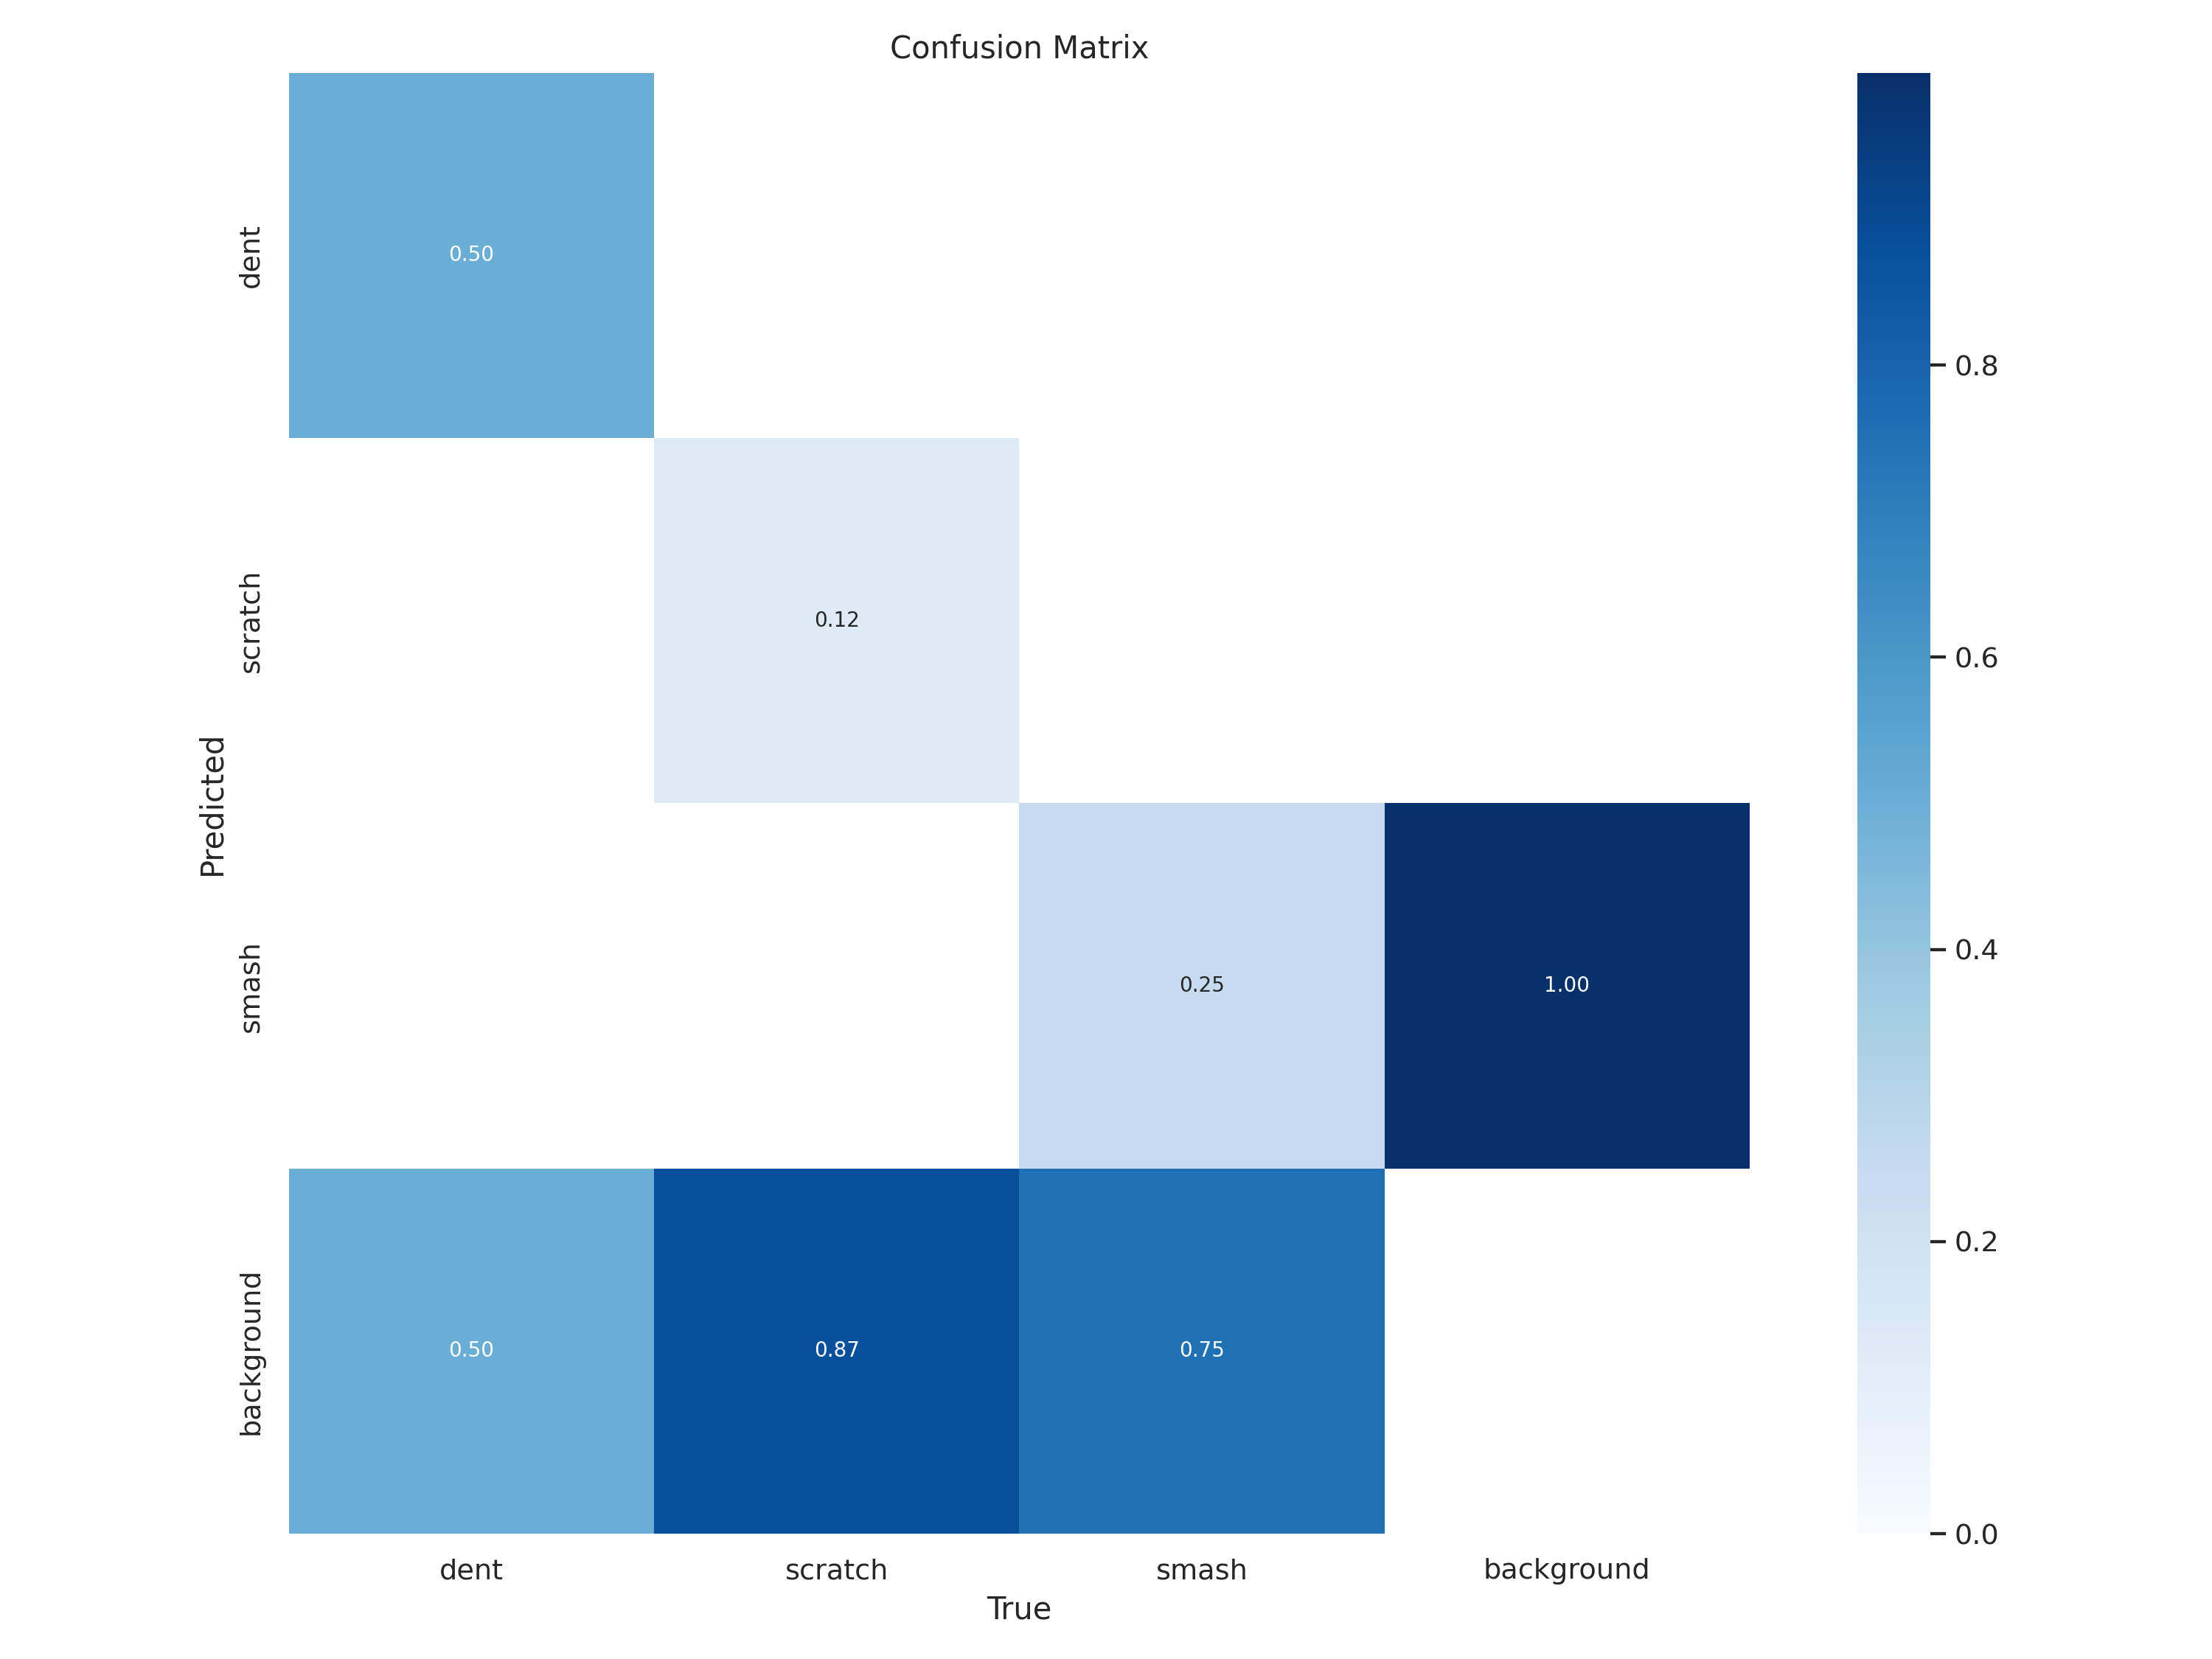

In [13]:
#confusion matrix
display(Image(filename=f'/content/{PROJECT_NAME}/{RUN_NAME}/confusion_matrix.png'))
print("\n")

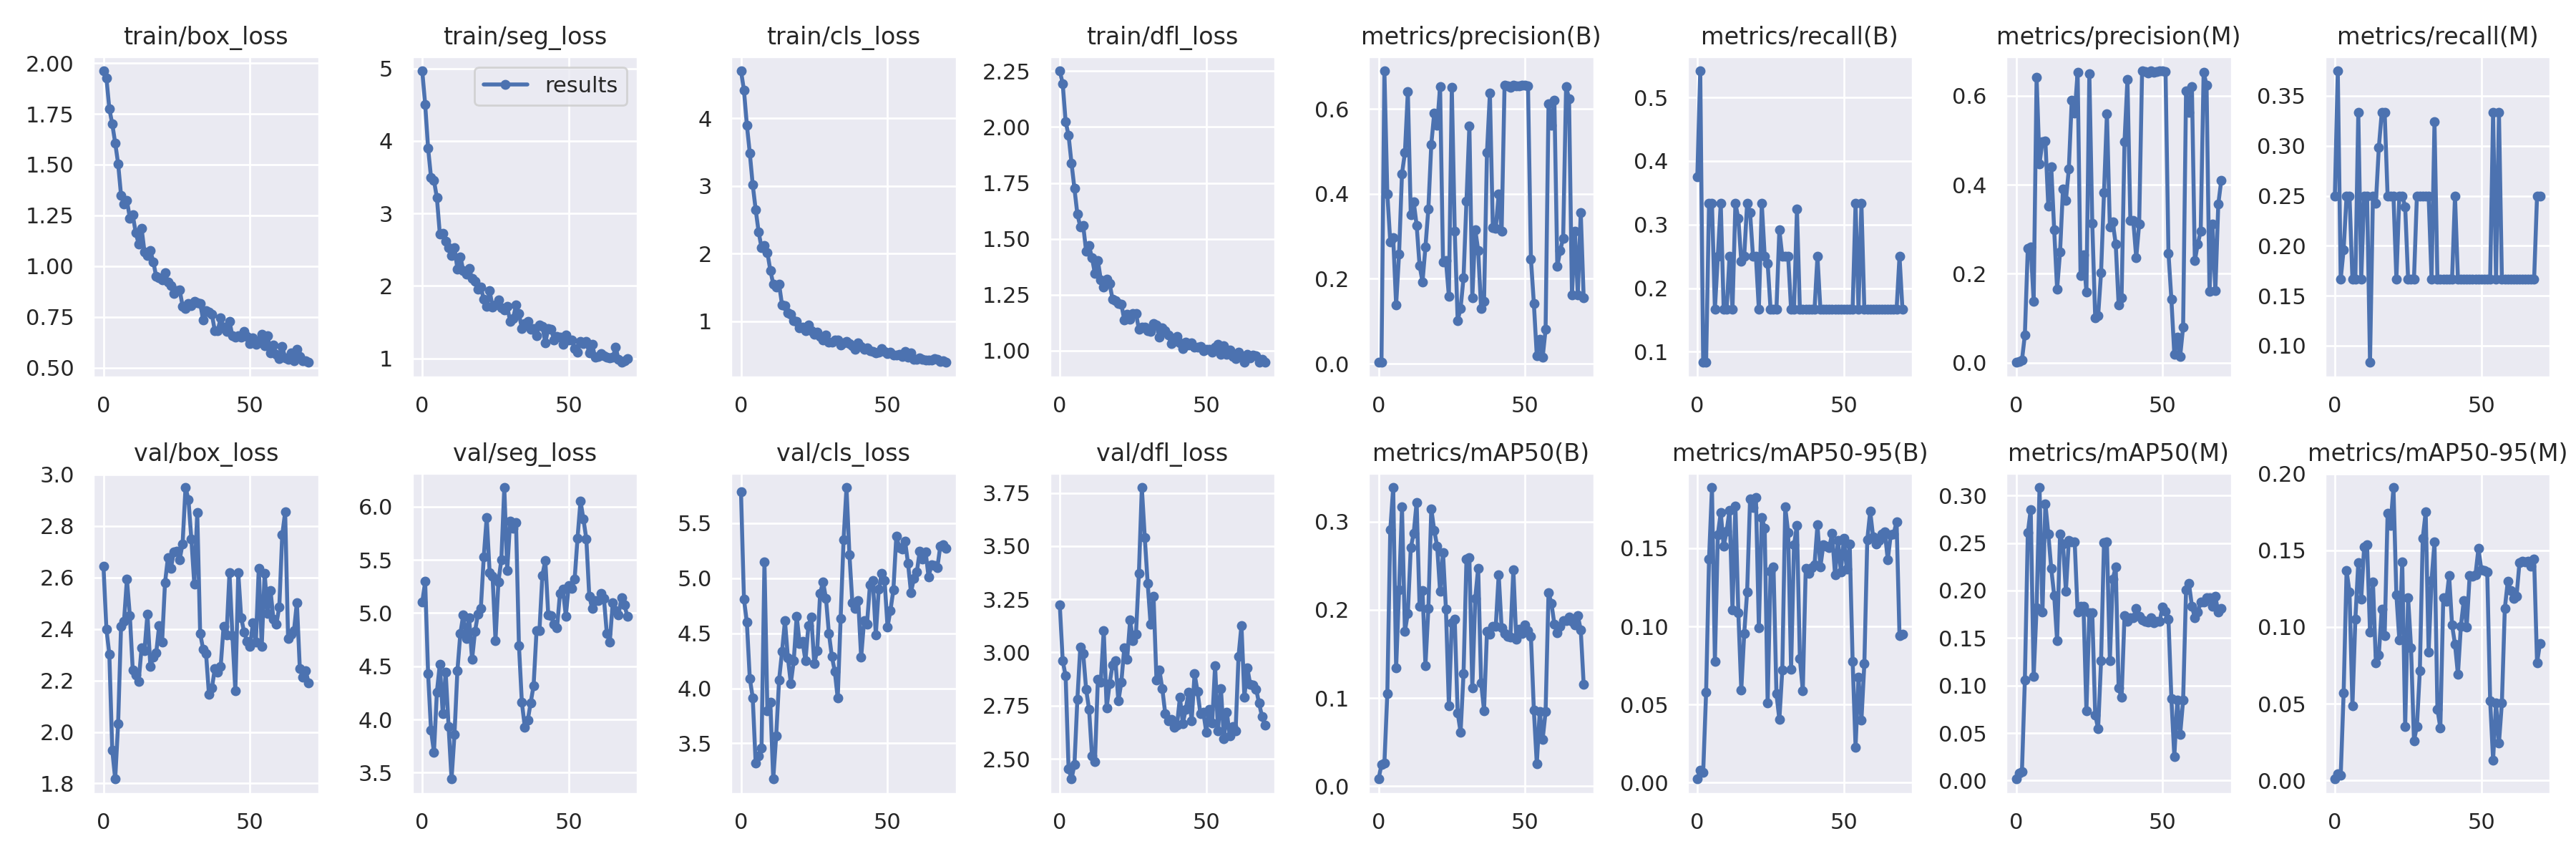

In [14]:
#training metrics
display(Image(filename=f'/content/{PROJECT_NAME}/{RUN_NAME}/results.png'))
print("\n")

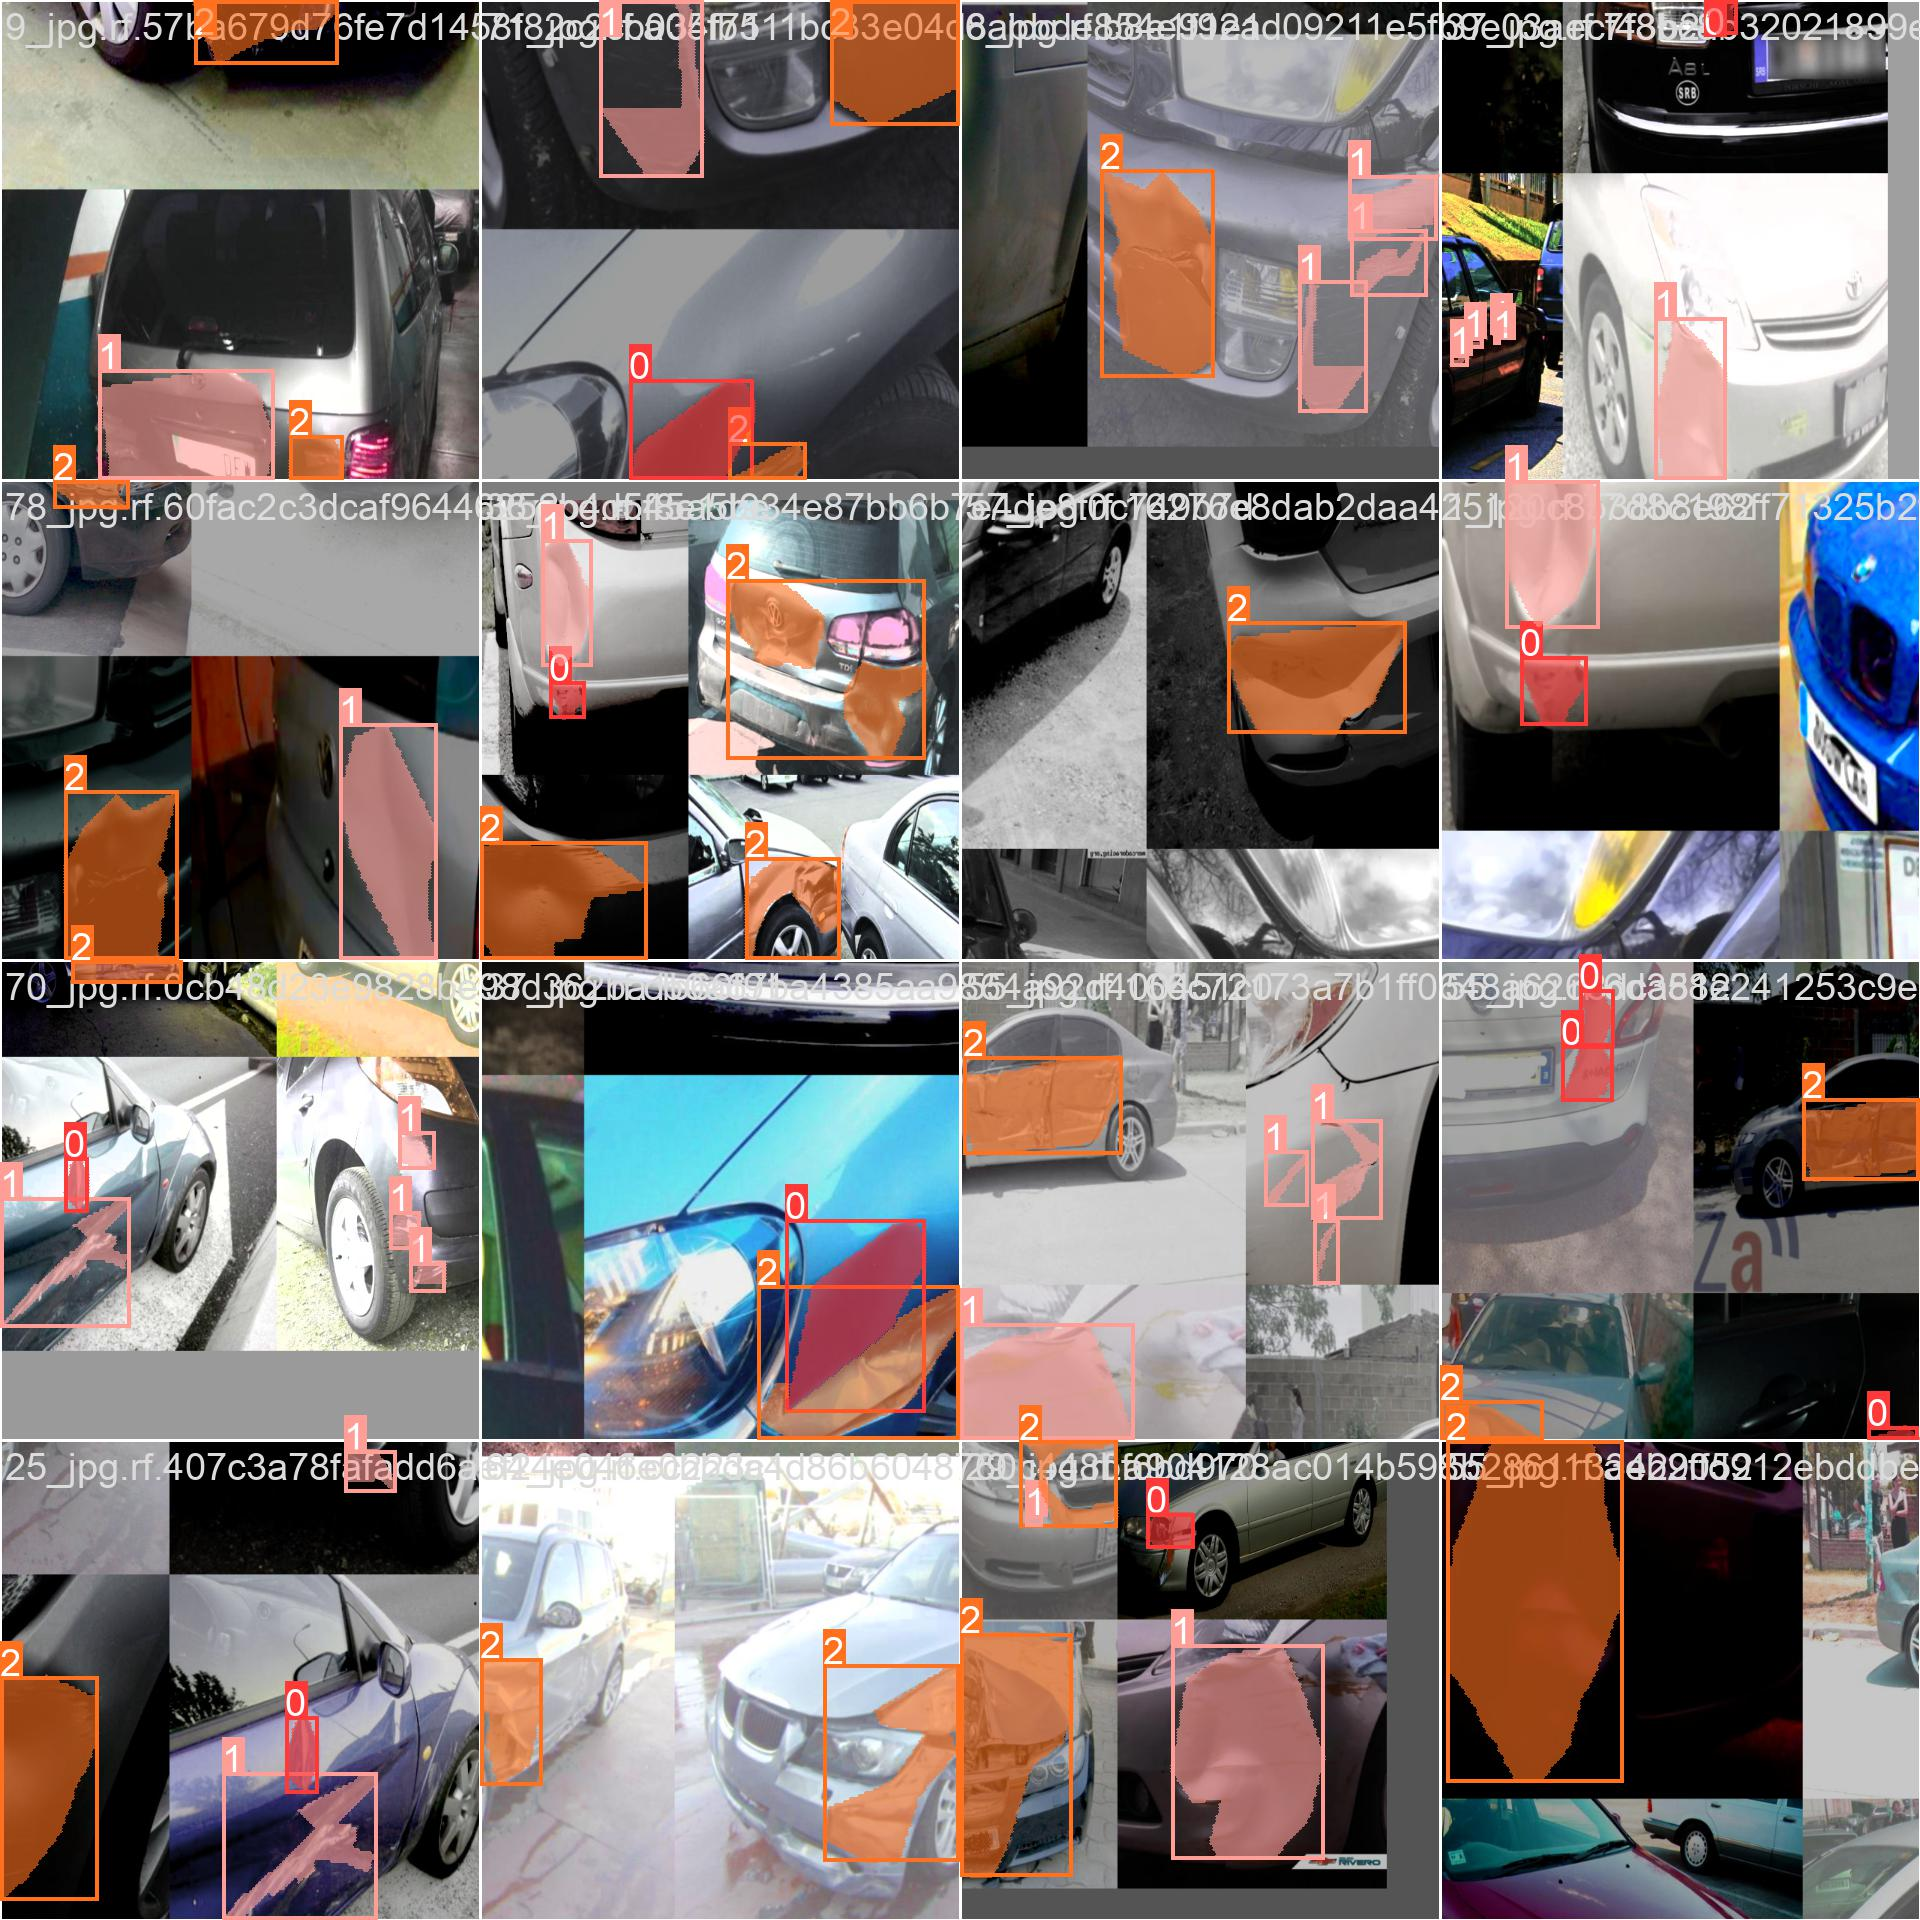

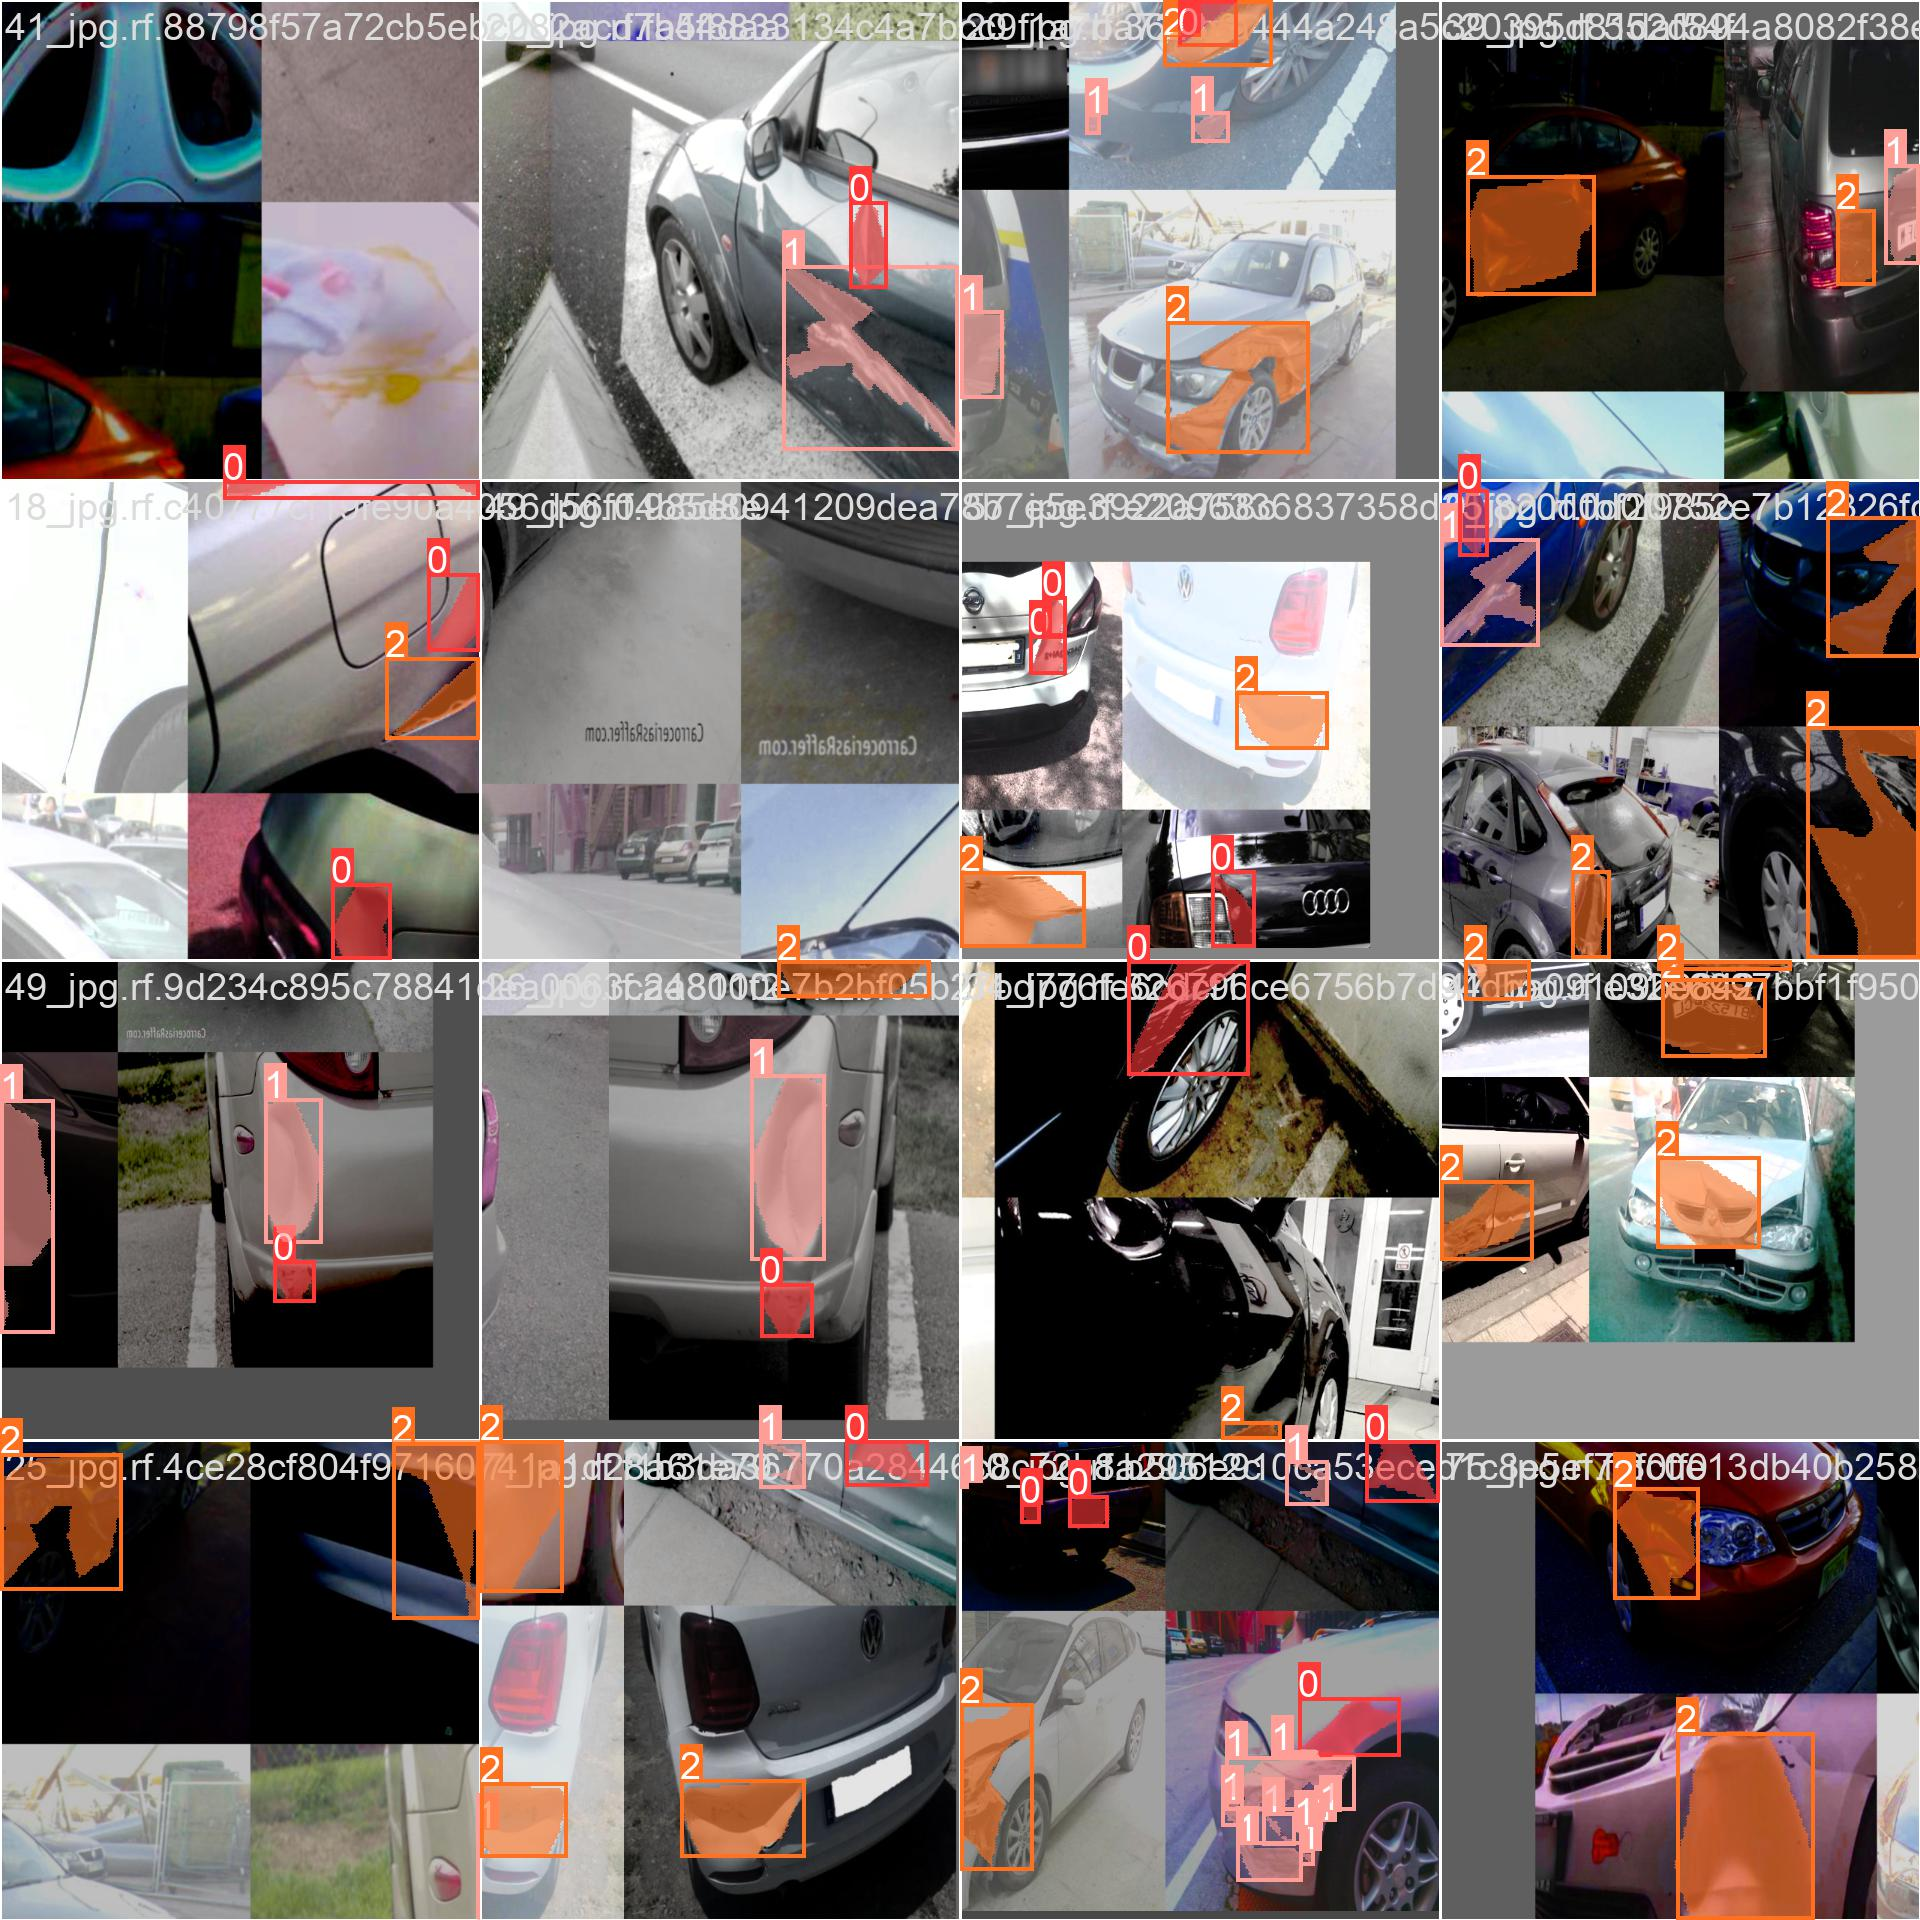

In [15]:
for imageName in glob.glob(f'/content/{PROJECT_NAME}/{RUN_NAME}/train_*.jpg')[:2]:
      display(Image(filename=imageName))
      print("\n")



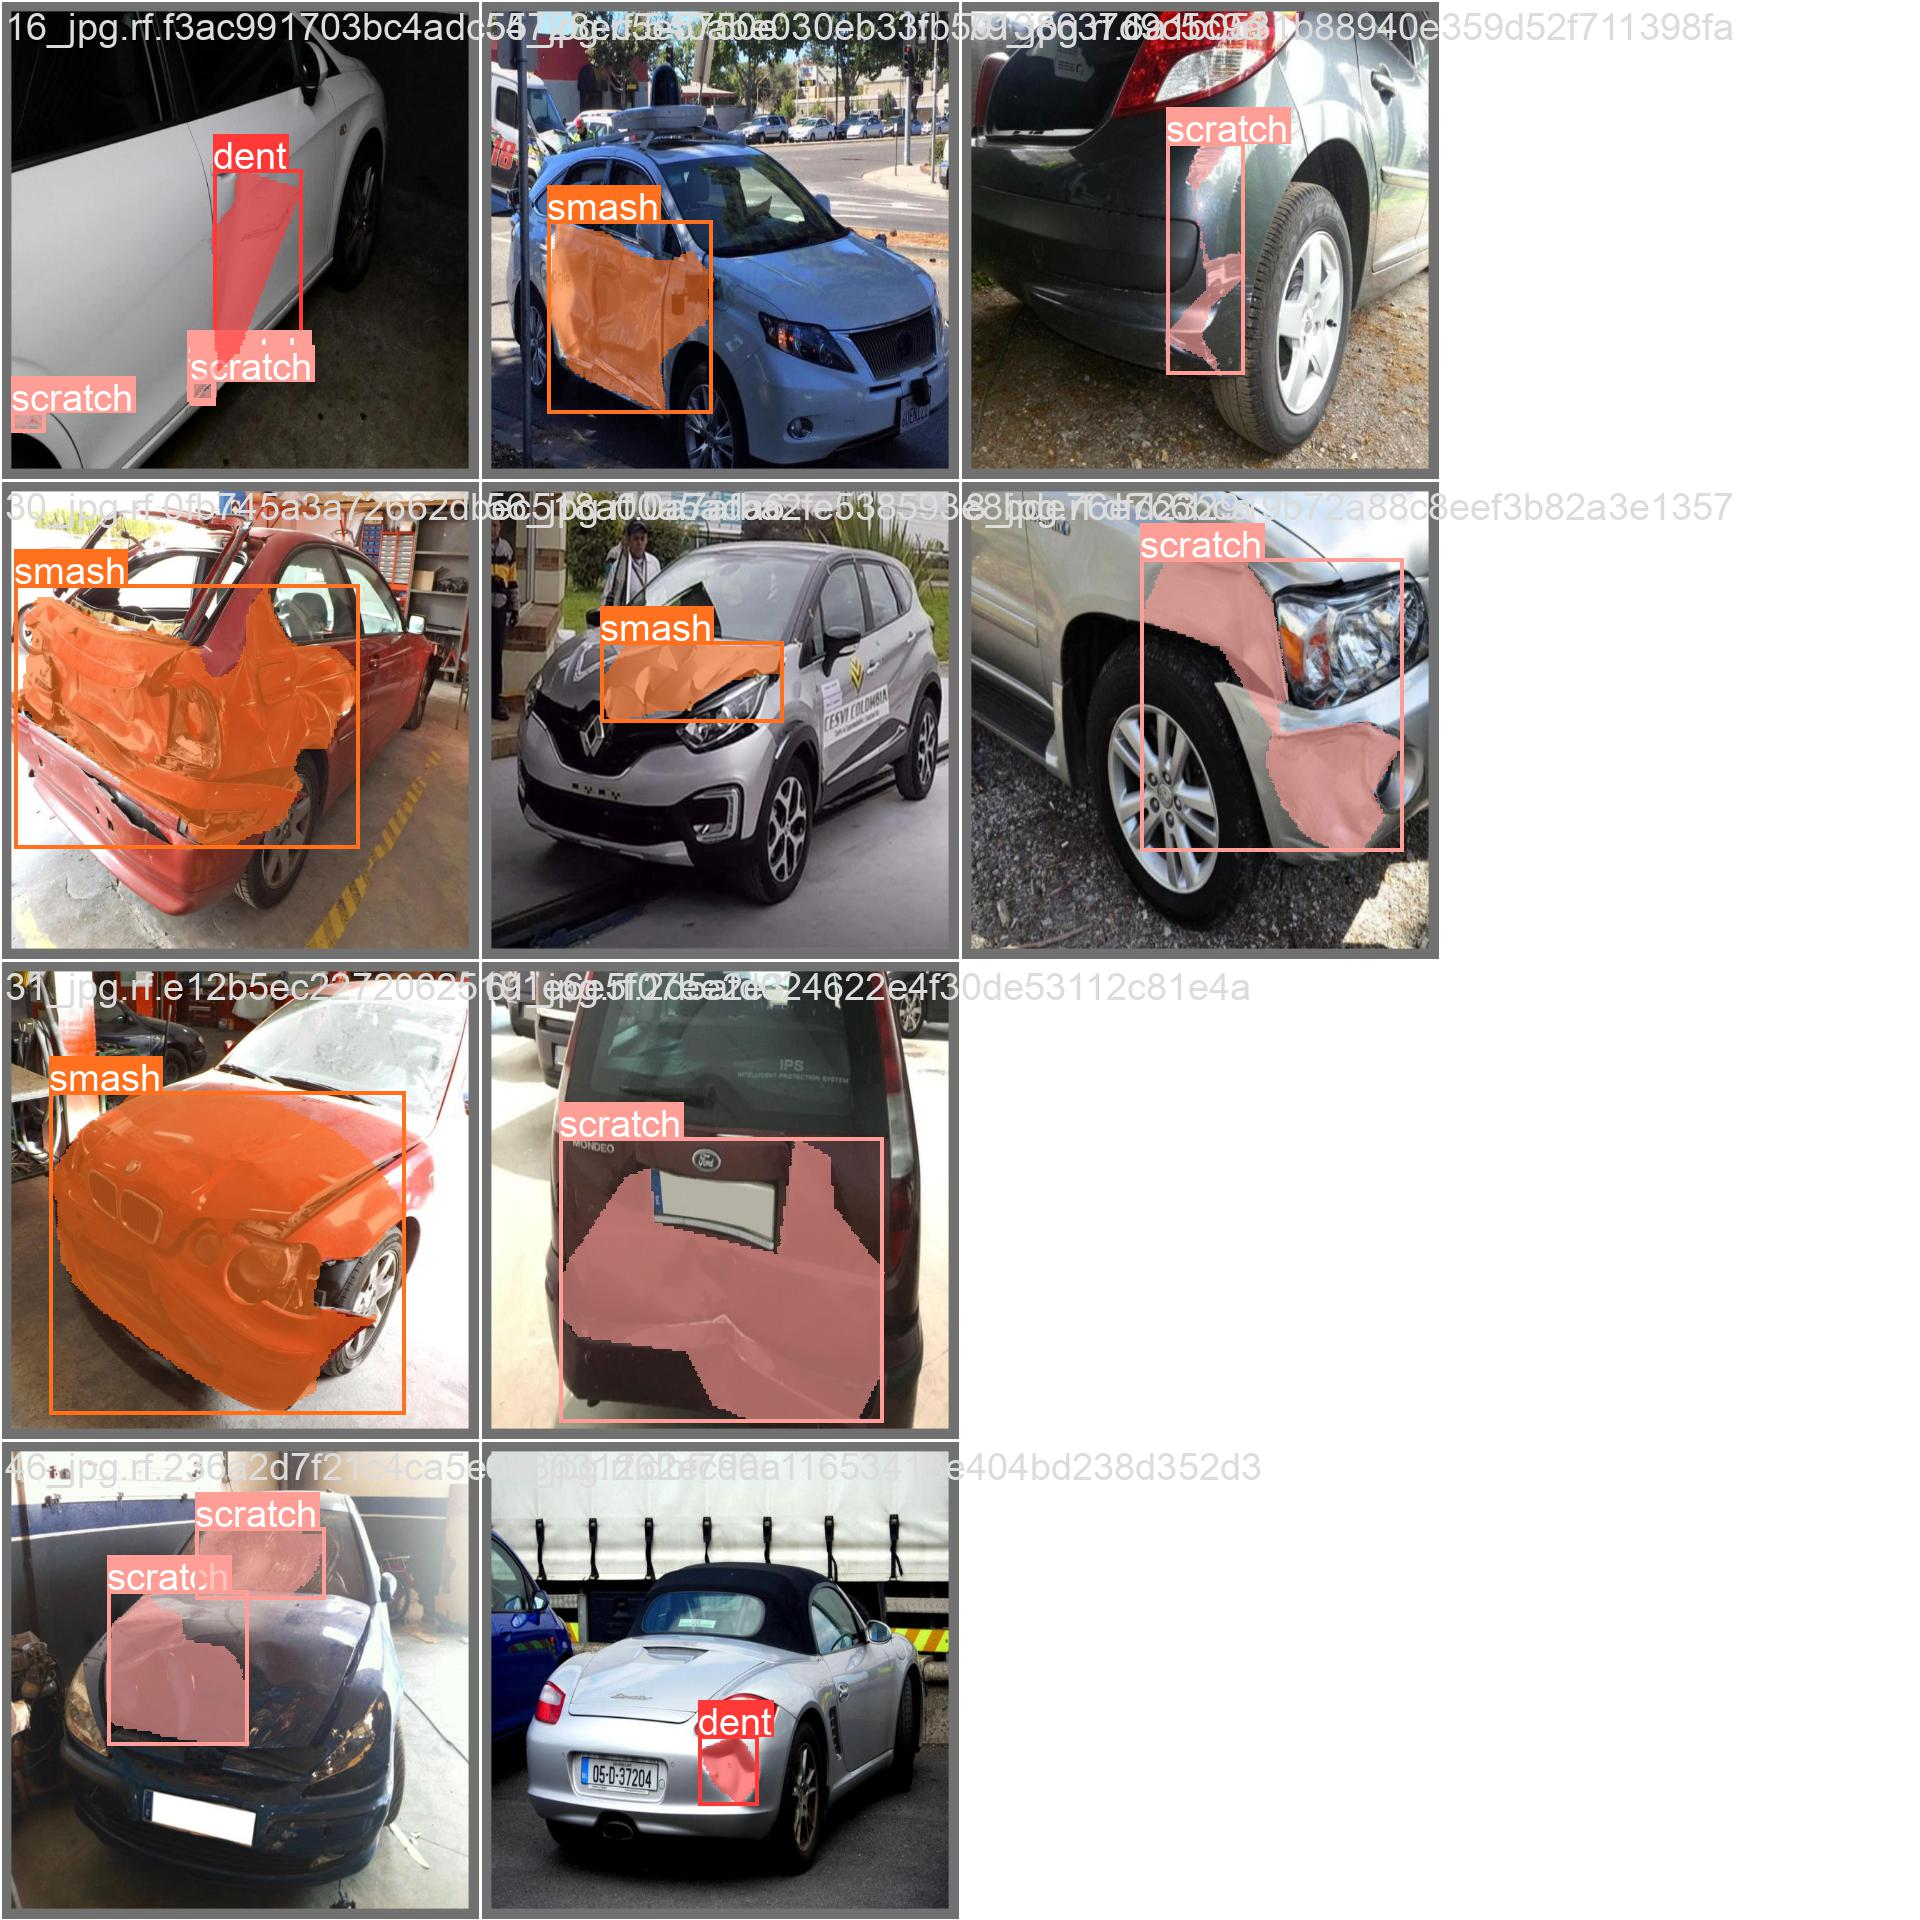

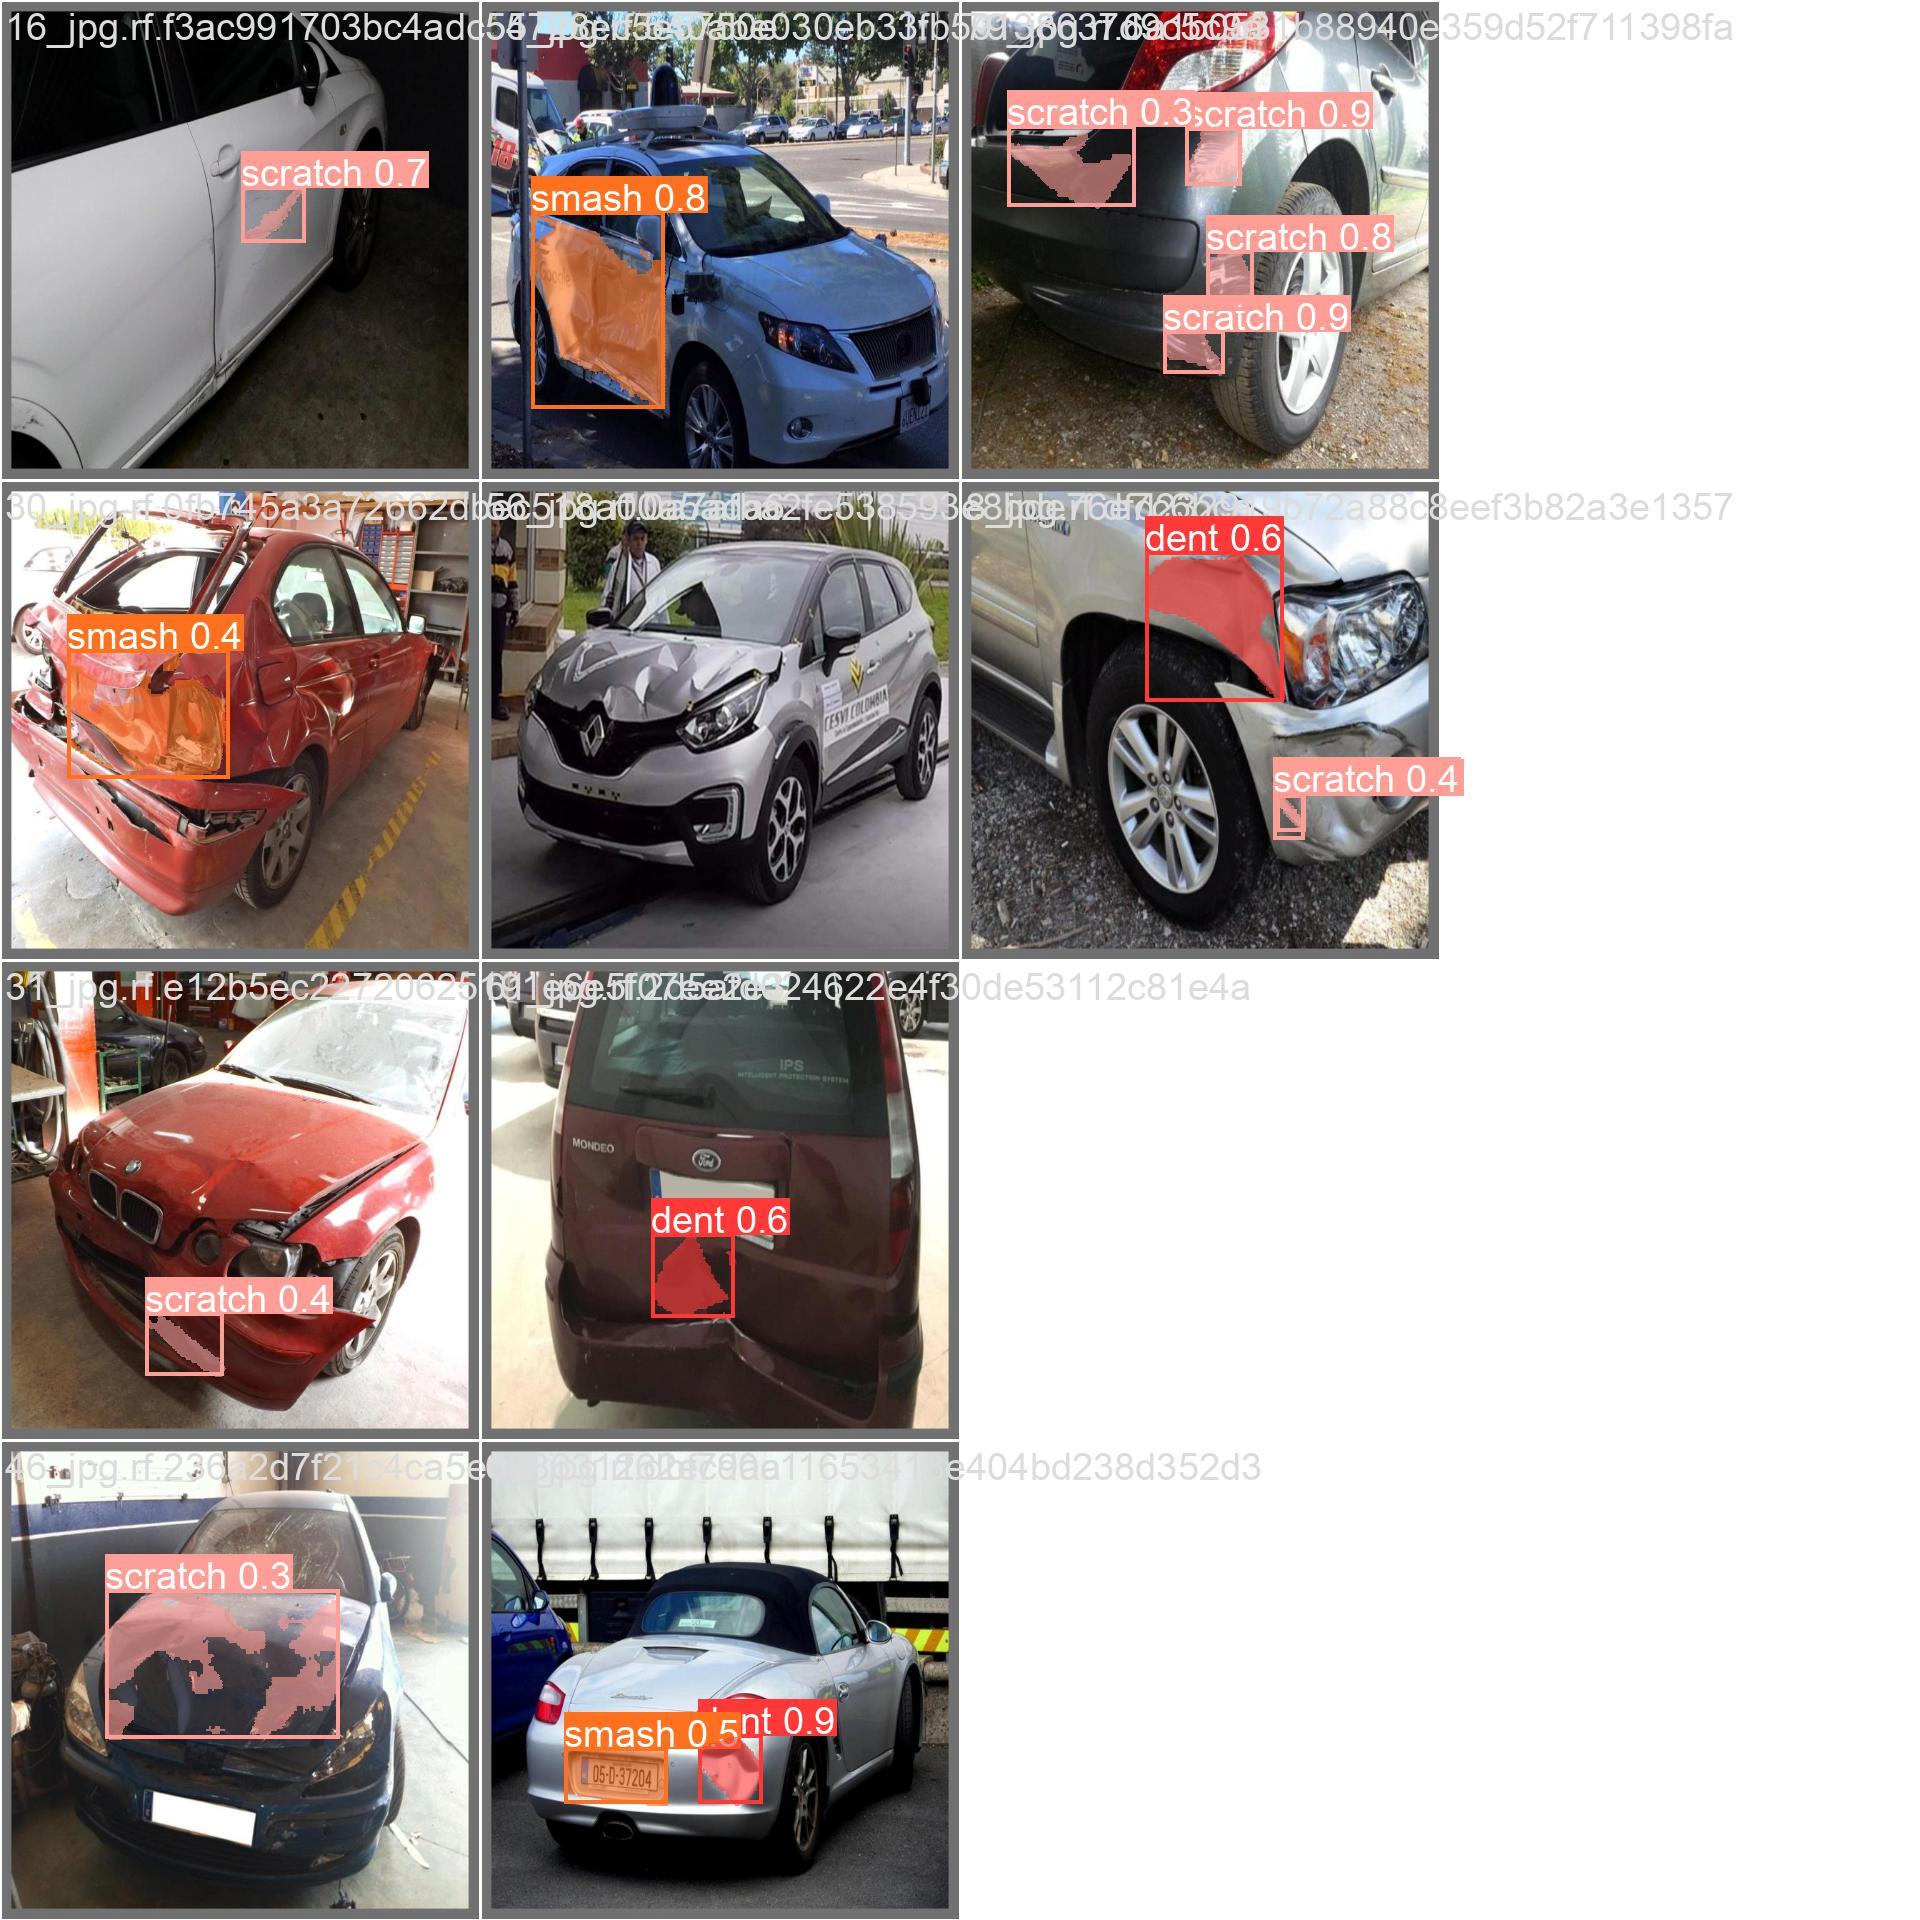

In [16]:
for imageName in glob.glob(f'/content/{PROJECT_NAME}/{RUN_NAME}/val_*.jpg')[:2]:
      display(Image(filename=imageName))
      print("\n")

# 5. Predict
Predict a model's accuracy on the dataset's `test` splits. 

In [17]:
BEST_WEIGHTS_PATH=f'/content/{PROJECT_NAME}/{RUN_NAME}/weights/best.pt'
TEST_SOURCE_PATH=f'/content/{DATA_FOLDER}/test/images'

!yolo task=$TASK \
      mode=predict \
      model= $BEST_WEIGHTS_PATH \
      source= $TEST_SOURCE_PATH \
      show=False \
      imgsz=$IMGSZ \
      project=$PROJECT_NAME \
      name=$RUN_NAME \
      hide_labels=True \
      conf=0.25 \
      save=True \
      box=False

Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914201 parameters, 0 gradients, 220.1 GFLOPs

image 1/7 /content/car-damage-type-1/test/images/10_jpg.rf.f760c1ccff722ab2134d8cfe704b3cd3.jpg: 640x640 1 scratch, 1 smash, 78.3ms
image 2/7 /content/car-damage-type-1/test/images/21_jpg.rf.c79ccb5125a33495256c9080dfaa5dd9.jpg: 640x640 1 scratch, 1 smash, 45.8ms
image 3/7 /content/car-damage-type-1/test/images/24_jpg.rf.9341ac5bc8eac32902ae3b9a3746e043.jpg: 640x640 1 dent, 2 scratchs, 45.8ms
image 4/7 /content/car-damage-type-1/test/images/33_jpg.rf.c96e5caf98b962619016d57f84c2a0bf.jpg: 640x640 1 dent, 1 scratch, 1 smash, 43.2ms
image 5/7 /content/car-damage-type-1/test/images/51_jpg.rf.ec46fa082dacb827dd60feee8ee1c7b5.jpg: 640x640 1 smash, 44.3ms
image 6/7 /content/car-damage-type-1/test/images/58_jpg.rf.7dad614391a8447684ebad1df445187d.jpg: 640x640 1 smash, 44.3ms
image 7/7 /content/car-damage-type-1/test/imag

In [18]:

for imageName in glob.glob(f'/content/{PROJECT_NAME}/{RUN_NAME}/train2/*.jpg')[:5]:
      display(Image(filename=imageName))
      print("\n")

# 4. Export

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



In [19]:
!yolo export model=$BEST_WEIGHTS_PATH format=onnx

Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8l-seg summary (fused): 295 layers, 45914201 parameters, 0 gradients, 220.1 GFLOPs

PyTorch: starting from /content/yolov8_damage_type/train_seg_100_epoch/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (88.0 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    

In [20]:
#Close clearML experiment
task.close()